In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
print(f'Training samples {len(x_train):,}')
print(f'Test samples {len(x_test):,}')

Training samples 60,000
Test samples 10,000


In [5]:
def show(idx):
    print(y_train[idx])
    plt.imshow(x_train[idx])

4


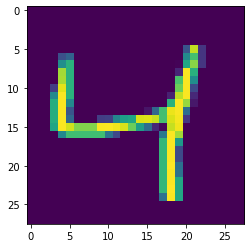

In [6]:
show(2)

In [7]:
np.random.seed(23)
tf.random.set_seed(23)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.0003),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                15050     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 251,060
Trainable params: 251,060
Non-trainable params: 0
__________________________________________________

In [8]:
model.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 3.6861 - accuracy: 0.2889
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7149 - accuracy: 0.3793
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4490 - accuracy: 0.4915
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1917 - accuracy: 0.6071
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9226 - accuracy: 0.6993
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7268 - accuracy: 0.7855
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5794 - accuracy: 0.8311
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4829 - accuracy: 0.8617
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4144 - accuracy: 0.8820
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.362

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1439 - accuracy: 0.9736


[0.14391466975212097, 0.9735999703407288]

In [10]:
model.save('model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model\assets
